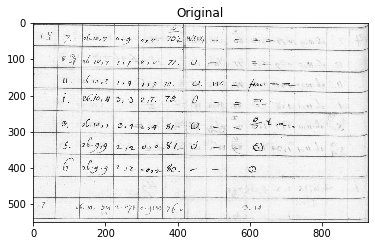

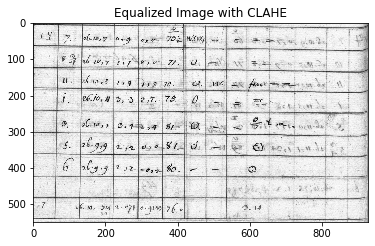

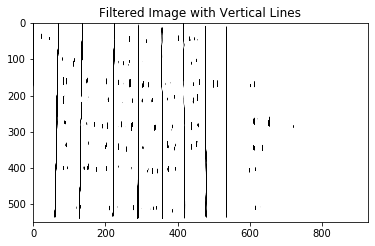

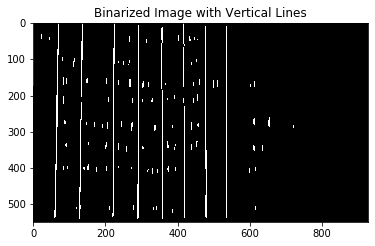

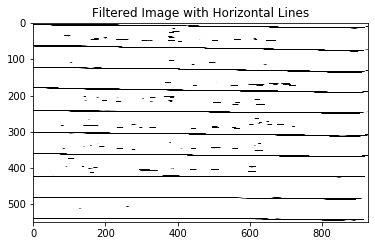

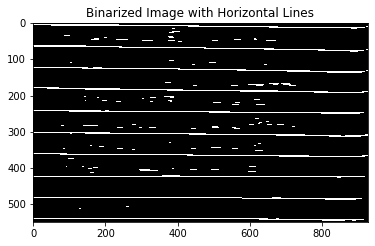

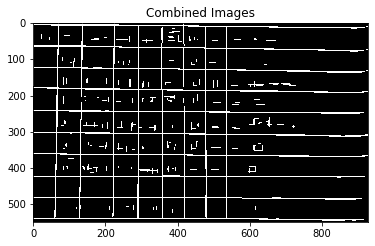

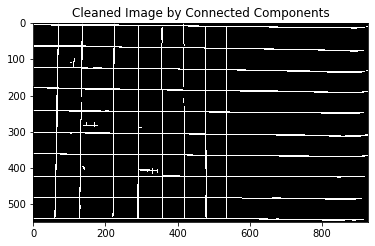

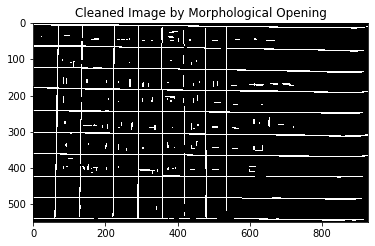

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def _get_kernel(theta) -> float:
    ksize = 31
    return cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)

    
def filter_image(img, theta=np.pi):
    kernel = _get_kernel(theta)
    return cv2.filter2D(img, -1, kernel)


def load_image(path: str):
    return cv2.imread(path)


def invert(img):
    return cv2.bitwise_not(img)


def binarize_image(img):   
    ret, img_binarized = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img_binarized


def equalize_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)


def remove_connected_components(img):
    number_of_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, 8, cv2.CV_32S)
    sizes = stats[1:, -1] 
    number_of_labels = number_of_labels - 1
    min_size = 350 
    
    img_cleaned = np.full(img.shape, 0)
    for i in range(0, number_of_labels):
        if sizes[i] >= min_size:
            img_cleaned[labels == i + 1] = 255
            
    return img_cleaned


def moprhological_opening(img):
    kernel = np.ones((3,3), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

    
def show_image(img, title="") -> None:
    plt.imshow(img, cmap='Greys_r')
    plt.title(title)
    plt.show()
    

def run():
    img = load_image('./assets/scan--no-borders.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show_image(img, "Original")
    
    img_equalized = equalize_image(img.copy())
    show_image(img_equalized, "Equalized Image with CLAHE")
    
    img_filtered = filter_image(img, theta=np.pi)
    show_image(img_filtered, "Filtered Image with Vertical Lines")
    
    img_vertical_binarized = binarize_image(img_filtered.copy())
    img_vertical_binarized = invert(img_vertical_binarized)
    show_image(img_vertical_binarized, "Binarized Image with Vertical Lines")
    
    img_filtered = filter_image(img, theta=np.pi/2)
    show_image(img_filtered, "Filtered Image with Horizontal Lines")
    
    img_horizontal_binarized = binarize_image(img_filtered.copy())
    img_horizontal_binarized = invert(img_horizontal_binarized)
    show_image(img_horizontal_binarized, "Binarized Image with Horizontal Lines")
    
    img_combined = cv2.bitwise_or(img_vertical_binarized, img_horizontal_binarized)
    show_image(img_combined, "Combined Images")
    
    img_cleaned = remove_connected_components(img_combined.copy())
    show_image(img_cleaned, "Cleaned Image by Connected Components")
    
    img_cleaned = moprhological_opening(img_combined.copy())
    show_image(img_cleaned, "Cleaned Image by Morphological Opening")
    
run()